In [1]:
pyodbc.drivers()

NameError: name 'pyodbc' is not defined

In [2]:
import pyodbc
import pandas as pd  # Import the Pandas library

# Define las credenciales de conexión
server = "sqlplnserver.database.windows.net"
database = "DB_TablesPLN"
username = "sqltfmejm_pln"
password = "tf4jm-d1scurs0s-2504"

# Crea una conexión a la base de datos
connection = pyodbc.connect(
    f"Driver={'ODBC Driver 18 for SQL Server'};Server={server};Database={database};Uid={username};Pwd={password};TrustServerCertificate=yes"
)

# Realiza la consulta SQL
cursor = connection.cursor()
cursor.execute(
    """
SELECT TOP (50000) 
       [file_name]
      ,[year]
      ,[president_name]
      ,[country]
      ,[speech_type]
      ,[text_raw]
      ,[id_sentence]
      ,[sentence_number]
      ,[sentence]
      ,[clean_sentence]
      ,[sentence_length]
      ,[sentence_length_clean]
      ,[id_entity]
      ,[model]
      ,[context]
      ,[raw_entity]
      ,[entity]
      ,[tag]
      ,[entity_cluster]
      ,[descripcion_tag]
      ,[tag_spanish]
      ,[id_sentiment]
      ,[sentiment_score]
      ,[sentiment_category]
  FROM [dbo].[DimEntity]
"""
)
# Crea una lista con los títulos de las columnas
columnas = [
    "file_name",
    "year",
    "president_name",
    "country",
    "speech_type",
    "text_raw",
    "id_sentence",
    "sentence_number",
    "sentence",
    "clean_sentence",
    "sentence_length",
    "sentence_length_clean",
    "id_entity",
    "model",
    "context",
    "raw_entity",
    "entity",
    "tag",
    "entity_cluster",
    "descripcion_tag",
    "tag_spanish",
    "id_sentiment",
    "sentiment_score",
    "sentiment_category",
]
# Obtén los resultados de la consulta como listas
rows = [columnas] + [list(row) for row in cursor.fetchall()]

# Crea un dataframe con los resultados de la consulta
df = pd.DataFrame(rows, columns=columnas)

# # Define la primera fila como los títulos de las columnas
df.columns = df.iloc[0]

# # Elimina la primera fila
df = df.iloc[1:]

# Cierra la conexión
connection.close()

# Imprime el dataframe
print(df)

0                                file_name  year     president_name  \
1          Argentina_2023_Javier_Milei.pdf  2023       Javier_Milei   
2          Argentina_2023_Javier_Milei.pdf  2023       Javier_Milei   
3          Argentina_2023_Javier_Milei.pdf  2023       Javier_Milei   
4          Argentina_2023_Javier_Milei.pdf  2023       Javier_Milei   
5          Argentina_2023_Javier_Milei.pdf  2023       Javier_Milei   
...                                    ...   ...                ...   
6492           Peru_2023_Dina_Boluarte.pdf  2023      Dina_Boluarte   
6493           Peru_2023_Dina_Boluarte.pdf  2023      Dina_Boluarte   
6494           Peru_2023_Dina_Boluarte.pdf  2023      Dina_Boluarte   
6495           Peru_2023_Dina_Boluarte.pdf  2023      Dina_Boluarte   
6496  Argentina_2022_Alberto_Fernandez.pdf  2022  Alberto_Fernandez   

0       country    speech_type  \
1     Argentina  Independencia   
2     Argentina  Independencia   
3     Argentina  Independencia   
4     Argen

In [3]:
import seaborn as sns
import pandas as pd

# Obtiene el tipo de variable de cada columna
tipos_variables = df.dtypes

# Imprime el tipo de variable de cada columna
for columna, tipo_variable in tipos_variables.items():
    print(f"Columna: {columna}, Tipo de variable: {tipo_variable}")

Columna: file_name, Tipo de variable: object
Columna: year, Tipo de variable: object
Columna: president_name, Tipo de variable: object
Columna: country, Tipo de variable: object
Columna: speech_type, Tipo de variable: object
Columna: text_raw, Tipo de variable: object
Columna: id_sentence, Tipo de variable: object
Columna: sentence_number, Tipo de variable: object
Columna: sentence, Tipo de variable: object
Columna: clean_sentence, Tipo de variable: object
Columna: sentence_length, Tipo de variable: object
Columna: sentence_length_clean, Tipo de variable: object
Columna: id_entity, Tipo de variable: object
Columna: model, Tipo de variable: object
Columna: context, Tipo de variable: object
Columna: raw_entity, Tipo de variable: object
Columna: entity, Tipo de variable: object
Columna: tag, Tipo de variable: object
Columna: entity_cluster, Tipo de variable: object
Columna: descripcion_tag, Tipo de variable: object
Columna: tag_spanish, Tipo de variable: object
Columna: id_sentiment, Tipo

In [4]:
# Estadísticas descriptivas
df.head()

,file_name,year,president_name,country,speech_type,text_raw,id_sentence,sentence_number,sentence,clean_sentence,...,context,raw_entity,entity,tag,entity_cluster,descripcion_tag,tag_spanish,id_sentiment,sentiment_score,sentiment_category
1,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",0,1,"Palabras del presidente de la Nación, Alberto ...","Palabras del presidente de la Nación, Alberto ...",...,None,None,None,None,None,None,None,None,None,None
2,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"Palabras del presidente de la [ENTIDAD], Alber...",Nación,nación,LOC,3,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,POS
3,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"presidente de la Nación, [ENTIDAD], en el acto...",Alberto Fernández,alberto fernández,PER,4,Nombres de personas,Persona,0,0.9167,POS
4,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"de gobierno, desde el [ENTIDAD], Casa Rosada M...",Parque Colón,parque colón,LOC,4,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,POS
5,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"desde el Parque Colón, [ENTIDAD] Muy buenos dí...",Casa Rosada,casa rosada,LOC,4,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,POS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 1 to 6496
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   file_name              6496 non-null   object
 1   year                   6496 non-null   object
 2   president_name         6496 non-null   object
 3   country                6496 non-null   object
 4   speech_type            6496 non-null   object
 5   text_raw               6496 non-null   object
 6   id_sentence            6495 non-null   object
 7   sentence_number        6495 non-null   object
 8   sentence               6483 non-null   object
 9   clean_sentence         6483 non-null   object
 10  sentence_length        6495 non-null   object
 11  sentence_length_clean  6495 non-null   object
 12  id_entity              5472 non-null   object
 13  model                  5472 non-null   object
 14  context                5472 non-null   object
 15  raw_entity           

In [6]:
df.shape

(6496, 24)

In [7]:
df.dropna(inplace=True)
df.shape

(5429, 24)

In [8]:
# esta es para toda la union de tabla
df["year"] = df["year"].astype("int")
df["id_sentence"] = df["id_sentence"].astype("int")
df["sentence_number"] = df["sentence_number"].astype("int")
df["sentence_length"] = df["sentence_length"].astype("int")
df["sentence_length_clean"] = df["sentence_length_clean"].astype("int")
df["id_entity"] = df["id_entity"].astype("int")
df["id_sentiment"] = df["id_sentiment"].astype("int")
df["sentiment_score"] = pd.to_numeric(df["sentiment_score"])


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 2 to 6495
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file_name              5429 non-null   object 
 1   year                   5429 non-null   int32  
 2   president_name         5429 non-null   object 
 3   country                5429 non-null   object 
 4   speech_type            5429 non-null   object 
 5   text_raw               5429 non-null   object 
 6   id_sentence            5429 non-null   int32  
 7   sentence_number        5429 non-null   int32  
 8   sentence               5429 non-null   object 
 9   clean_sentence         5429 non-null   object 
 10  sentence_length        5429 non-null   int32  
 11  sentence_length_clean  5429 non-null   int32  
 12  id_entity              5429 non-null   int32  
 13  model                  5429 non-null   object 
 14  context                5429 non-null   object 
 15  raw_

In [9]:
df.describe()

,year,id_sentence,sentence_number,sentence_length,sentence_length_clean,id_entity,id_sentiment,sentiment_score
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,2018.916559,909.921717,90.382575,97.781175,97.609136,2987.102966,907.480015,0.898204
std,2.784617,589.471996,66.621892,301.436869,301.470525,1769.589627,588.464518,0.131568
min,2014.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.444700
25%,2016.000000,405.000000,29.000000,14.000000,14.000000,1358.000000,403.000000,0.829900
50%,2019.000000,798.000000,83.000000,24.000000,24.000000,2974.000000,796.000000,0.966900
75%,2021.000000,1421.000000,146.000000,38.000000,37.000000,4602.000000,1419.000000,0.991500
max,2023.000000,2041.000000,249.000000,1976.000000,1976.000000,5994.000000,2033.000000,0.999300


In [10]:
df.shape

(5429, 24)

In [11]:
df.columns.values

array(['file_name', 'year', 'president_name', 'country', 'speech_type',
       'text_raw', 'id_sentence', 'sentence_number', 'sentence',
       'clean_sentence', 'sentence_length', 'sentence_length_clean',
       'id_entity', 'model', 'context', 'raw_entity', 'entity', 'tag',
       'entity_cluster', 'descripcion_tag', 'tag_spanish', 'id_sentiment',
       'sentiment_score', 'sentiment_category'], dtype=object)

In [12]:
# Obtiene los valores únicos de la columna "nombre"
valores_unicos = df["sentiment_category"].unique()

# Imprime los valores únicos
print(valores_unicos)

df2 = df

['POS' 'NEG' 'NEU']


In [13]:
valores_reemplazo = {"POS": 1, "NEU": 0, "NEG": -1}
df2["sentiment_category"] = df2["sentiment_category"].replace(valores_reemplazo)

df2["sentiment_category"] = df2["sentiment_category"].astype("int")
df2.head()

,file_name,year,president_name,country,speech_type,text_raw,id_sentence,sentence_number,sentence,clean_sentence,...,context,raw_entity,entity,tag,entity_cluster,descripcion_tag,tag_spanish,id_sentiment,sentiment_score,sentiment_category
2,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"Palabras del presidente de la [ENTIDAD], Alber...",Nación,nación,LOC,3,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,1
3,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"presidente de la Nación, [ENTIDAD], en el acto...",Alberto Fernández,alberto fernández,PER,4,Nombres de personas,Persona,0,0.9167,1
4,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"de gobierno, desde el [ENTIDAD], Casa Rosada M...",Parque Colón,parque colón,LOC,4,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,1
5,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"desde el Parque Colón, [ENTIDAD] Muy buenos dí...",Casa Rosada,casa rosada,LOC,4,"Ubicaciones geográficas, como países, ciudades...",Localización,0,0.9167,1
6,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,"Palabras del presidente de la [ENTIDAD], Alber...",Nación,nación,ORG,3,"Organizaciones, incluyendo empresas y agencias...",Organización,0,0.9167,1


In [14]:
# Obtiene los valores únicos de la columna "nombre"
valores_unicos = df["president_name"].unique()

# Imprime los valores únicos
print(valores_unicos)

['Javier_Milei' 'Ivan_Duque' 'Gustavo_Petro' 'Ollanta_Humala'
 'Pedro_Kuczynski' 'Martin_Vizcarra' 'Pedro_Castillo' 'Dina_Boluarte']


In [15]:
import category_encoders as ce
import pandas as pd

# Selecciona las columnas deseadas de df2
df2_seleccion = df2[
    ["president_name", "country", "raw_entity", "entity", "tag", "tag_spanish"]
]
df2_seleccion.head()

,president_name,country,raw_entity,entity,tag,tag_spanish
2,Javier_Milei,Argentina,Nación,nación,LOC,Localización
3,Javier_Milei,Argentina,Alberto Fernández,alberto fernández,PER,Persona
4,Javier_Milei,Argentina,Parque Colón,parque colón,LOC,Localización
5,Javier_Milei,Argentina,Casa Rosada,casa rosada,LOC,Localización
6,Javier_Milei,Argentina,Nación,nación,ORG,Organización


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ["president_name", "country", "raw_entity", "entity", "tag", "tag_spanish"]:
    df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])

df2["president_name_codificado"] = df2_seleccion["president_name"]
df2["country_codificado"] = df2_seleccion["country"]
df2["raw_entity_codificado"] = df2_seleccion["raw_entity"]
df2["entity_codificado"] = df2_seleccion["entity"]
df2["tag_codificado"] = df2_seleccion["tag"]
df2["tag_spanish_codificado"] = df2_seleccion["tag_spanish"]

df2_seleccion.head()

df2 = pd.concat([df2, df2_seleccion], axis=1)

df2.head()

C:\Users\linkl\AppData\Local\Temp\ipykernel_16672\2865459821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_16672\2865459821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_16672\2865459821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,file_name,year,president_name,country,speech_type,text_raw,id_sentence,sentence_number,sentence,clean_sentence,...,raw_entity_codificado,entity_codificado,tag_codificado,tag_spanish_codificado,president_name,country,raw_entity,entity,tag,tag_spanish
2,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,1039,1089,0,1,3,0,1039,1089,0,1
3,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,122,129,4,4,3,0,122,129,4,4
4,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,1135,1182,0,1,3,0,1135,1182,0,1
5,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,322,336,0,1,3,0,322,336,0,1
6,Argentina_2023_Javier_Milei.pdf,2023,Javier_Milei,Argentina,Independencia,"Palabras del presidente de la Nación, Javier M...",1,2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",...,1039,1089,2,3,3,0,1039,1089,2,3


In [17]:
df2.loc[:, df2.dtypes == "object"] = df2.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 2 to 6495
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   file_name                  5429 non-null   category
 1   year                       5429 non-null   int32   
 2   president_name             5429 non-null   category
 3   country                    5429 non-null   category
 4   speech_type                5429 non-null   category
 5   text_raw                   5429 non-null   category
 6   id_sentence                5429 non-null   int32   
 7   sentence_number            5429 non-null   int32   
 8   sentence                   5429 non-null   category
 9   clean_sentence             5429 non-null   category
 10  sentence_length            5429 non-null   int32   
 11  sentence_length_clean      5429 non-null   int32   
 12  id_entity                  5429 non-null   int32   
 13  model                      5429 n

In [18]:
data2 = df2
data2 = data2.drop(
    columns=[
        "president_name",
        "country",
        "raw_entity",
        "entity",
        "tag",
        "tag_spanish",
        "id_sentiment",
        "tag_spanish_codificado",
        "id_entity",
        "id_sentence",
        "sentence_length",
    ],
    errors="ignore",
)
data2.head()

,file_name,year,speech_type,text_raw,sentence_number,sentence,clean_sentence,sentence_length_clean,model,context,entity_cluster,descripcion_tag,sentiment_score,sentiment_category,president_name_codificado,country_codificado,raw_entity_codificado,entity_codificado,tag_codificado
2,Argentina_2023_Javier_Milei.pdf,2023,Independencia,"Palabras del presidente de la Nación, Javier M...",2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",31,NER,"Palabras del presidente de la [ENTIDAD], Alber...",3,"Ubicaciones geográficas, como países, ciudades...",0.9167,1,3,0,1039,1089,0
3,Argentina_2023_Javier_Milei.pdf,2023,Independencia,"Palabras del presidente de la Nación, Javier M...",2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",31,NER,"presidente de la Nación, [ENTIDAD], en el acto...",4,Nombres de personas,0.9167,1,3,0,122,129,4
4,Argentina_2023_Javier_Milei.pdf,2023,Independencia,"Palabras del presidente de la Nación, Javier M...",2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",31,NER,"de gobierno, desde el [ENTIDAD], Casa Rosada M...",4,"Ubicaciones geográficas, como países, ciudades...",0.9167,1,3,0,1135,1182,0
5,Argentina_2023_Javier_Milei.pdf,2023,Independencia,"Palabras del presidente de la Nación, Javier M...",2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",31,NER,"desde el Parque Colón, [ENTIDAD] Muy buenos dí...",4,"Ubicaciones geográficas, como países, ciudades...",0.9167,1,3,0,322,336,0
6,Argentina_2023_Javier_Milei.pdf,2023,Independencia,"Palabras del presidente de la Nación, Javier M...",2,"En verdad, es un lindo día para que nos encont...","En verdad, es un lindo día para que nos encont...",31,BERT,"Palabras del presidente de la [ENTIDAD], Alber...",3,"Organizaciones, incluyendo empresas y agencias...",0.9167,1,3,0,1039,1089,2


In [19]:
data2.shape

(5429, 19)

In [20]:
""" is any missing values across columns"""
data2.isnull().any()

0
file_name                    False
year                         False
speech_type                  False
text_raw                     False
sentence_number              False
sentence                     False
clean_sentence               False
sentence_length_clean        False
model                        False
context                      False
entity_cluster               False
descripcion_tag              False
sentiment_score              False
sentiment_category           False
president_name_codificado    False
country_codificado           False
raw_entity_codificado        False
entity_codificado            False
tag_codificado               False
dtype: bool

In [21]:
""" count of missing values of the entire dataframe"""
data2.isnull().sum().sum()

0

In [22]:
data2.isnull().sum()

0
file_name                    0
year                         0
speech_type                  0
text_raw                     0
sentence_number              0
sentence                     0
clean_sentence               0
sentence_length_clean        0
model                        0
context                      0
entity_cluster               0
descripcion_tag              0
sentiment_score              0
sentiment_category           0
president_name_codificado    0
country_codificado           0
raw_entity_codificado        0
entity_codificado            0
tag_codificado               0
dtype: int64

In [23]:
import pandas as pd

total = data2.isnull().sum().sort_values(ascending=False)
percent_1 = data2.isnull().sum() / data2.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
0,,
file_name,0,0.0
entity_cluster,0,0.0
entity_codificado,0,0.0
raw_entity_codificado,0,0.0
country_codificado,0,0.0
president_name_codificado,0,0.0
sentiment_category,0,0.0
sentiment_score,0,0.0
descripcion_tag,0,0.0


In [24]:
data2.describe()

,year,sentence_number,sentence_length_clean,sentiment_score,sentiment_category,president_name_codificado,country_codificado,raw_entity_codificado,entity_codificado,tag_codificado
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,2018.916559,90.382575,97.609136,0.898204,0.293056,4.602137,1.825382,879.508381,874.814883,1.277215
std,2.784617,66.621892,301.470525,0.131568,0.628005,1.983657,0.499901,491.996041,482.907978,1.294495
min,2014.000000,1.000000,1.000000,0.444700,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,29.000000,14.000000,0.829900,0.000000,4.000000,2.000000,433.000000,437.000000,0.000000
50%,2019.000000,83.000000,24.000000,0.966900,0.000000,5.000000,2.000000,883.000000,900.000000,1.000000
75%,2021.000000,146.000000,37.000000,0.991500,1.000000,6.000000,2.000000,1272.000000,1268.000000,2.000000
max,2023.000000,249.000000,1976.000000,0.999300,1.000000,7.000000,2.000000,1823.000000,1762.000000,4.000000


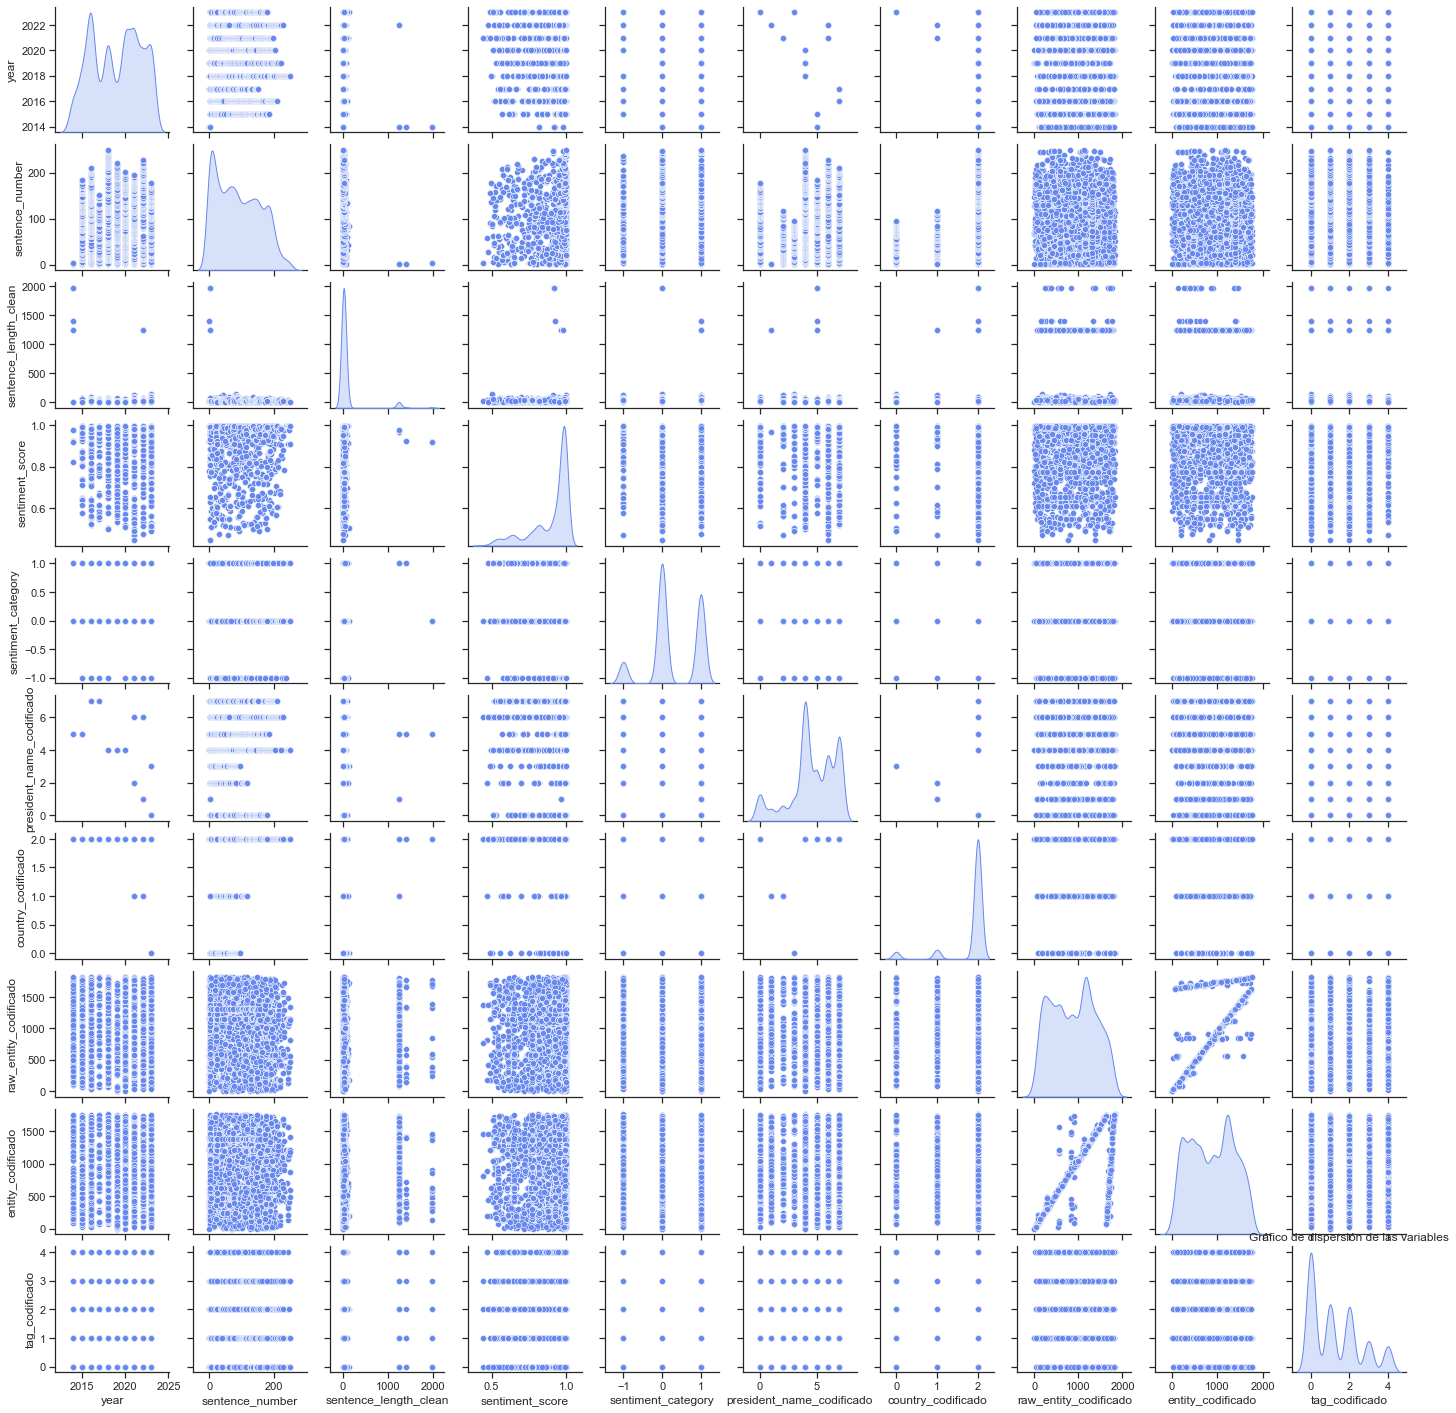

In [25]:
import matplotlib.pyplot as plt

# Establecer el estilo y los colores
sns.set(style="ticks", palette="coolwarm")

# Generar el gráfico pairplot
sns.pairplot(data2, height=2, diag_kind="kde", palette="coolwarm")

# Personalizar las etiquetas de los ejes
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

# Añadir un título al gráfico
plt.title("Gráfico de dispersión de las variables")

# Mostrar el gráfico
plt.show()

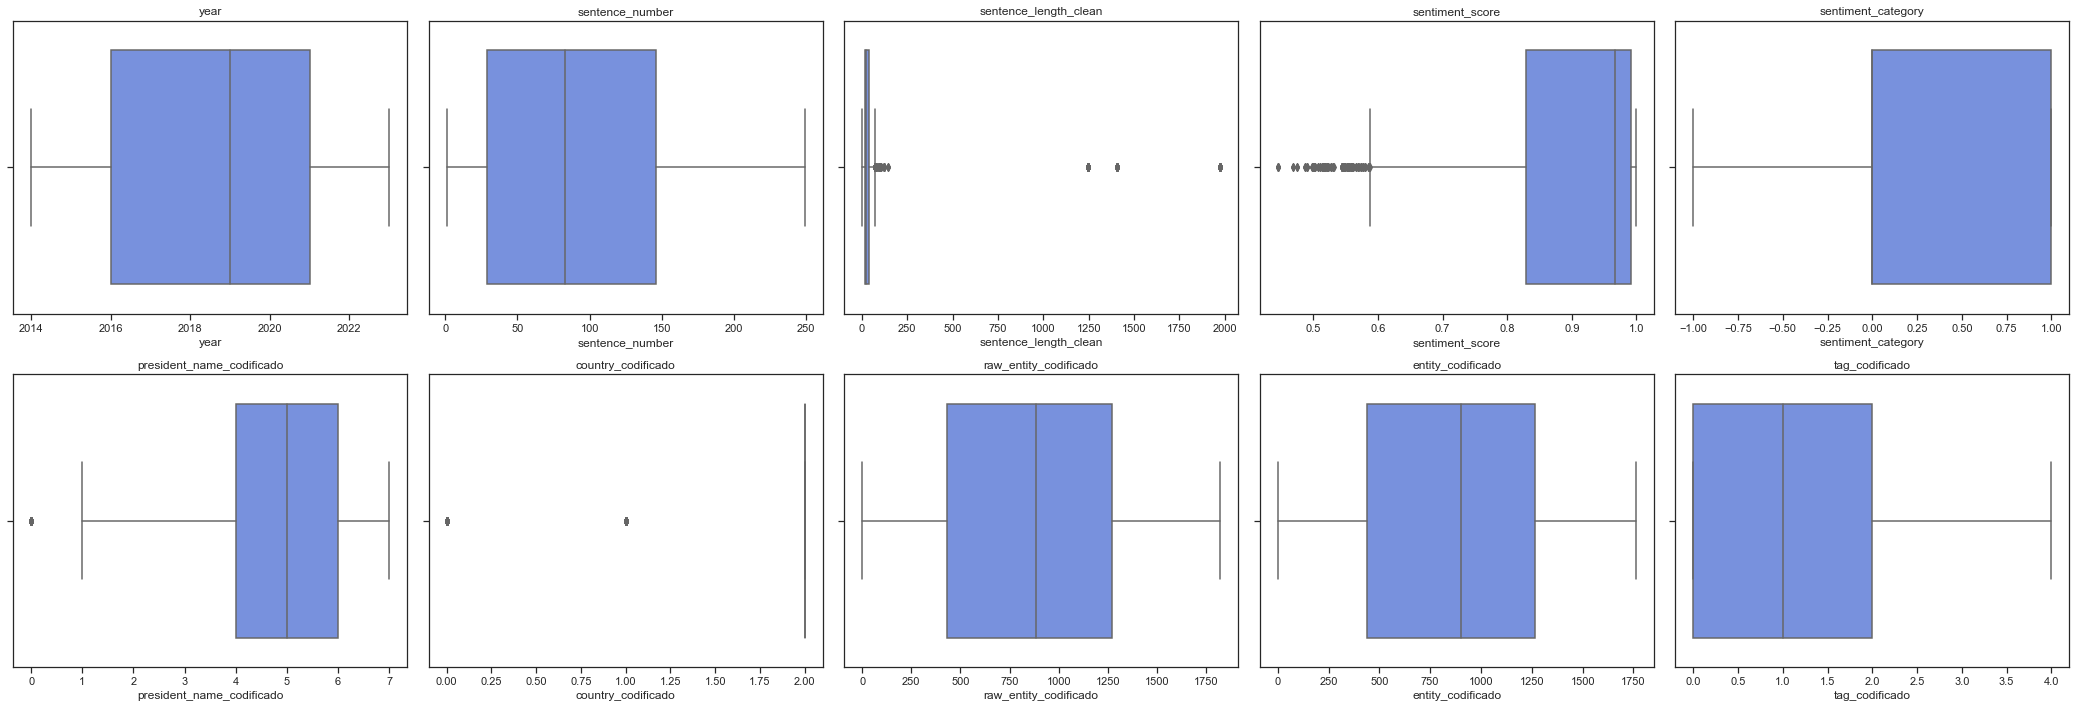

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(29, 10))  # Establece el tamaño del gráfico

# Selecciona las columnas relevantes (excluyendo "quality")
columns = [
    "year",
    "sentence_number",
    "sentence_length_clean",
    "sentiment_score",
    "sentiment_category",
    "president_name_codificado",
    "country_codificado",
    "raw_entity_codificado",
    "entity_codificado",
    "tag_codificado",
]
color_palette = sns.color_palette(
    "coolwarm"
)  # Ajustar el brillo de la paleta de colores

# Genera los gráficos de cajas para las columnas seleccionadas
for i, col in enumerate(columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=data2[col])
    plt.title(col)
plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()  # Muestra los gráficos de cajas

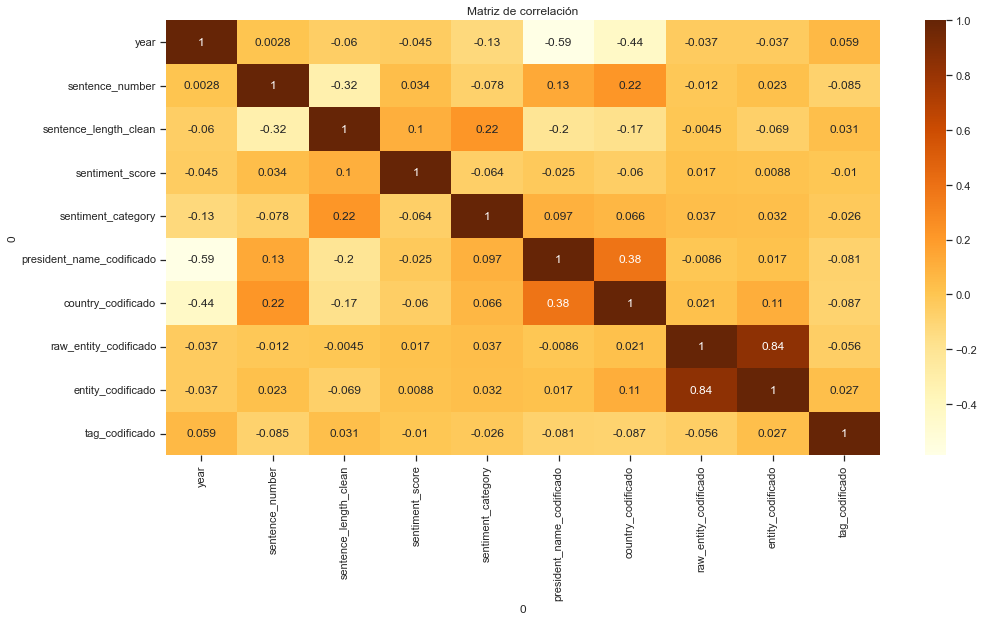

In [31]:
correlation_matrix = data2.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("Matriz de correlación")
plt.show()